In [1]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates

### Datasets

In [35]:
steamData = pd.read_csv('steam_data/steam.csv')
steamSpyTagData = pd.read_csv('steam_data/steamspy_tag_data.csv')
steamDescription = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_description/steam_description*.csv"))))
steamData.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [8]:
print("Steam Data Dims: ", steamData.shape)
print("Steam Tags Dims: ", steamSpyTagData.shape)
print("Steam Descriptions Dims : ", steamDescription.shape)

Steam Data Dims:  (27075, 18)
Steam Tags Dims:  (29022, 372)
Steam Descriptions Dims :  (27334, 4)


In [145]:
#rename for easier identification
steamData = steamData.rename(columns={"name": "title"})

#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamData['title'] = hero.clean(steamData['title'], pipeline = custom_pipeline)
steamData.sample(n=60)

,appid,title,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
19538,777530,salsa virtual,2018-11-09,1,Dance-Virtual,Miragic Labs,windows,0,Single-player,Casual;Indie;Simulation;Sports;Early Access,Early Access;Indie;Simulation,0,1,2,0,0,0-20000,15.49
14670,637100,sonic forces,2017-11-07,1,Sonic Team;Hardlight,SEGA,windows,0,Single-player;Steam Achievements;Full controll...,Action;Adventure,Great Soundtrack;Adventure;Character Customiza...,48,2156,1045,0,0,100000-200000,34.99
8974,465710,heroes tactics,2017-06-21,1,Camex Games,Camex Games,windows;mac,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Free to Play;Indie;RPG;Strategy,Strategy;Free to Play;RPG,0,120,83,27,27,50000-100000,0.00
7715,431540,frosty kiss,2016-01-08,1,2Chance Projects;IIchan Eroge Team,2Chance Projects,windows;linux,0,Single-player,Adventure;Casual;Free to Play;Indie,Free to Play;Visual Novel;Anime,6,1103,125,22,27,100000-200000,0.00
16802,698640,deep sky derelicts,2018-09-26,1,Snowhound Games,1C Entertainment,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Indie;RPG;Strategy,RPG;Strategy;Indie,54,436,132,0,0,20000-50000,15.49
22870,875780,trivia king,2018-06-22,1,LoadUpGames.com,LoadUpGames.com,windows;mac;linux,0,Single-player;Local Multi-Player;Shared/Split ...,Casual,Casual,0,1,0,0,0,0-20000,0.79
23971,913970,the legend of protey,2018-08-15,1,Dustin Chalker,Tuomo's games,windows,0,Single-player;Steam Achievements;Full controll...,Adventure;Casual;Indie,Adventure;Indie;Casual,9,2,0,0,0,0-20000,0.79
15577,665650,2v hoverbike,2017-07-06,1,Intertum,intertum,windows;mac,0,Single-player;Local Multi-Player;Steam Achieve...,Action;Indie,Action;Indie;Shoot 'Em Up,12,10,3,0,0,0-20000,1.99
23548,896550,the sea between,2018-11-12,1,Matthew Hare,Evil Bunny Studios,windows;mac,0,Single-player;Steam Achievements;Partial Contr...,RPG,RPG;JRPG;RPGMaker,22,10,0,0,0,0-20000,3.99
15199,656180,vault of honor,2017-07-14,1,Virtual Top,VT Publishing,windows,0,Single-player;Steam Achievements,Action;Adventure;Casual;Indie;RPG;Strategy,Adventure;Action;Casual,5000,30,56,0,0,20000-50000,3.99


### Extracting Values of Multipalyer and Singleplayer Tags

In [67]:
tags = pd.DataFrame(steamSpyTagData[["appid","singleplayer", "multiplayer"]])
tags

,appid,singleplayer,multiplayer
0,10,0,1659
1,20,0,172
2,30,16,115
3,40,0,58
4,50,148,0
...,...,...,...
29017,1065230,0,0
29018,1065570,0,0
29019,1065650,0,0
29020,1066700,0,0


### Sorting out games that have no singleplayer or multiplayer input

In [68]:
tags['null'] = np.where(tags['singleplayer'] == tags['multiplayer'], '1', '')
print(tags)

         appid  singleplayer  multiplayer null
0           10             0         1659     
1           20             0          172     
2           30            16          115     
3           40             0           58     
4           50           148            0     
...        ...           ...          ...  ...
29017  1065230             0            0    1
29018  1065570             0            0    1
29019  1065650             0            0    1
29020  1066700             0            0    1
29021  1069460             0            0    1

[29022 rows x 4 columns]


### Cleaning the data

In [69]:
tags_clean = tags.copy()
tags_clean['null'] = tags_clean['null'].astype(bool)
tags_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29022 entries, 0 to 29021
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   appid         29022 non-null  int64
 1   singleplayer  29022 non-null  int64
 2   multiplayer   29022 non-null  int64
 3   null          29022 non-null  bool 
dtypes: bool(1), int64(3)
memory usage: 708.7 KB


In [70]:
#Deleting all rows that have no single/multiplayer inputs

tags_clean = tags_clean[tags_clean.null != True]
tags_clean

,appid,singleplayer,multiplayer,null
0,10,0,1659,False
1,20,0,172,False
2,30,16,115,False
3,40,0,58,False
4,50,148,0,False
...,...,...,...,...
28993,1059190,11,0,False
28999,1060170,11,0,False
29000,1060300,11,0,False
29011,1063230,11,0,False


In [89]:
# sorting out singleplayer games (considered singleplayer when votes for singleplayer>multiplayer)

tags_clean['single'] = np.where(tags_clean["multiplayer"] == 0 , '1', '0')
tags_clean

,appid,singleplayer,multiplayer,null,single
0,10,0,1659,False,0
1,20,0,172,False,0
2,30,16,115,False,0
3,40,0,58,False,0
4,50,148,0,False,1
...,...,...,...,...,...
28993,1059190,11,0,False,1
28999,1060170,11,0,False,1
29000,1060300,11,0,False,1
29011,1063230,11,0,False,1


In [101]:
# Clean df of singleplayer games

singleplayer_games = tags_clean[tags_clean.single != '0']
single = singleplayer_games.drop(['null','single'], axis = 1)
single

,appid,singleplayer,multiplayer
4,50,148,0
8,130,136,0
16,380,264,0
17,400,1214,0
29,1300,16,0
...,...,...,...
28993,1059190,11,0
28999,1060170,11,0
29000,1060300,11,0
29011,1063230,11,0


In [103]:
# Clean data of multiplayer games

multiplayer_games = tags_clean[tags_clean.single != '1']
multi = multiplayer_games.drop(["null","single"], axis = 1)
multi

,appid,singleplayer,multiplayer
0,10,0,1659
1,20,0,172
2,30,16,115
3,40,0,58
5,60,0,59
...,...,...,...
28820,1044200,10,53
28835,1045080,0,13
28889,1049090,0,11
28895,1049660,0,9


In [166]:
steamData_m = steamData.appid.isin(tags.appid)
steamData_match = steamData[steamData_m]
steamData_match_title = pd.DataFrame(steamData_match['title'])
steamData_tags = pd.concat([steamData_match['title'], tags[['appid', 'singleplayer', 'multiplayer']]], axis = 1)
steam_matches = steamData_tags.dropna()
steam_matches

,title,appid,singleplayer,multiplayer
0,counter strike,10,0,1659
1,team fortress classic,20,0,172
2,day of defeat,30,16,115
3,deathmatch classic,40,0,58
4,half life opposing force,50,148,0
...,...,...,...,...
27070,room of pandora,964040,0,0
27071,cyber gun,964050,0,0
27072,super star blast,964060,0,0
27073,new yankee 7 deer hunters,964070,0,0


In [94]:
multiplayer_games_final = pd.concat([steamData_match, multi], axis = 1)
mlti_games = multiplayer_games_final.dropna()
mlti_games

,appid,title,appid,singleplayer,multiplayer
0,10.0,counter strike,10.0,0.0,1659.0
1,20.0,team fortress classic,20.0,0.0,172.0
2,30.0,day of defeat,30.0,16.0,115.0
3,40.0,deathmatch classic,40.0,0.0,58.0
5,60.0,ricochet,60.0,0.0,59.0
...,...,...,...,...,...
26822,1040940.0,protocol vr,954170.0,0.0,19.0
26852,1043030.0,chang tian long sky,955410.0,11.0,12.0
26928,1048170.0,latangerine last journey,958790.0,11.0,12.0
26934,1048640.0,at home,959080.0,0.0,34.0


In [116]:
singleplayer_games_final = pd.concat([steamData_match, single], axis = 1)
sngl_games = singleplayer_games_final.dropna()
sngl_games

,appid,title,appid,singleplayer,multiplayer
4,50.0,half life opposing force,50.0,148.0,0.0
8,130.0,half life blue shift,130.0,136.0,0.0
16,380.0,half life 2 episode one,380.0,264.0,0.0
17,400.0,portal,400.0,1214.0,0.0
29,1300.0,sin episodes emergence,1300.0,16.0,0.0
...,...,...,...,...,...
27048,1059500.0,puzzle ocean,963280.0,51.0,0.0
27057,1061230.0,scream of the viking 3,963660.0,12.0,0.0
27063,1063060.0,montecube dodge,963860.0,10.0,0.0
27064,1063230.0,6120,963900.0,11.0,0.0


In [124]:
steamUniqueTitle = pd.read_excel("output.xlsx", sheet_name = 'Sheet1', header = 0)
steamUniqueTitle.head()

,Unnamed: 0,title,genre,release_date
0,0,playerunknown s battlegrounds,"Action,Adventure,Massively Multiplayer","Dec 21, 2017"
1,1,battletech,"Action,Adventure,Strategy","Apr 24, 2018"
2,2,dayz,"Action,Adventure,Massively Multiplayer","Dec 13, 2018"
3,3,human fall flat,"Adventure,Indie","Jul 22, 2016"
4,4,they are billions,"Strategy,Early Access","Dec 12, 2017"


In [167]:
match_title_single = steam_matches.title.isin(steamUniqueTitle.title)
single_player_games = steam_matches[match_title_single]
single_player_games

,title,appid,singleplayer,multiplayer
0,counter strike,10,0,1659
10,counter strike source,240,250,1455
21,left 4 dead 2,550,947,3176
23,portal 2,620,1849,1115
121,garry s mod,3570,0,0
...,...,...,...,...
20867,green hell,775520,12,0
21463,atlas,790760,0,0
22770,football manager 2019,826930,0,0
24798,among us,884260,0,0


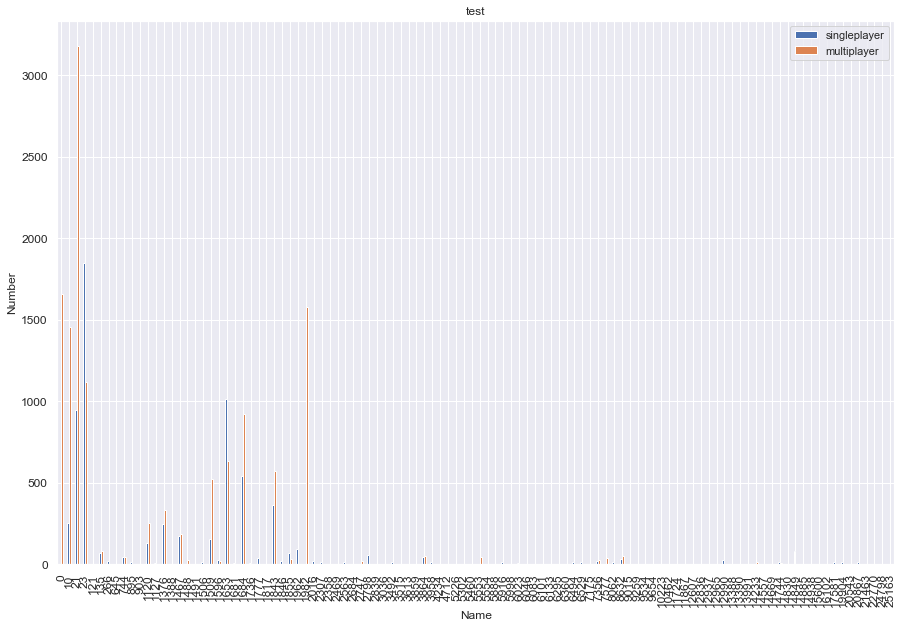

In [106]:
match_title_single = steamUniqueTitle.title.isin(sngl_games.title)
single_player_games = steamUniqueTitle[match_title_single]
single_player_games

,Unnamed: 0,title,genre,release_date
2,2,dayz,"Action,Adventure,Massively Multiplayer","Dec 13, 2018"
7,7,street fighter v,Action,"Feb 15, 2016"
10,10,fishing planet,"Free to Play,Massively Multiplayer,Simulation,...","Aug 11, 2015"
11,11,men of war assault squad 2,"Action,Simulation,Strategy","May 15, 2014"
19,19,total war attila,Strategy,"Feb 17, 2015"
34,34,mount blade warband,"Action,RPG","Mar 31, 2010"
37,37,the binding of isaac rebirth,Action,"Nov 4, 2014"
47,47,car mechanic simulator 2018,"Racing,Simulation","Jul 28, 2017"
51,51,kenshi,"Action,Indie,RPG,Simulation,Strategy","Dec 6, 2018"
54,54,subnautica,"Adventure,Indie","Jan 23, 2018"


In [119]:
single_player_games.shape

(25, 4)

In [118]:
match_title_multi = steamUniqueTitle.title.isin(mlti_games.title)
multi_player_games = steamUniqueTitle[match_title_multi]
multi_player_games

,Unnamed: 0,title,genre,release_date
5,5,counter strike source,Action,"Nov 1, 2004"
17,17,dragon s dogma dark arisen,"Action,Adventure,RPG","Jan 15, 2016"
27,27,euro truck simulator 2,"Indie,Simulation","Oct 12, 2012"
28,28,assetto corsa,"Indie,Racing,Simulation,Sports","Dec 19, 2014"
33,33,killing floor 2,Action,"Nov 18, 2016"
35,35,rising storm 2 vietnam,"Action,Massively Multiplayer,Simulation,Strategy","May 30, 2017"
43,43,portal 2,"Action,Adventure","Apr 18, 2011"
44,44,oxygen not included,"Indie,Simulation,Early Access","May 18, 2017"
45,45,beamng drive,"Racing,Simulation,Early Access","May 29, 2015"
49,49,left 4 dead 2,Action,"Nov 16, 2009"


In [120]:
multi_player_games.shape

(24, 4)